# Homework 10

## Visualize Activations of a Convolutional Neural Network

The first part of this example shows how to feed an image to a convolutional neural network and display the activations of different layers of the network. Examine the activations and discover which features the network learns by comparing areas of activation with the original image. Find out that channels in earlier layers learn simple features like color and edges while channels in the deeper layers learn complex features like eyes. Identifying the features in this way can help you understand what the network has learned. 



## Load a Pretrained network and data.
Load a pretrained VGG16 network. 


In [1]:
# load vgg model
from tensorflow.keras.applications.vgg16 import VGG16
# load the model
model = VGG16()

553467904/553467096 [==============================] - 20s 0us/step


## View Network Architecture
Analyze the network to see which layers you can look at. The convolutional layers perform convolutions with learnable parameters. The network learns to identify useful features, often with one feature per channel. Observe that the first convolutional layer has 64 channels

In [2]:
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

The Image Input Layer specifies the input size. 

We can access the first convolutional layer using the command below

In [3]:
model.layers[1]

There are 64 3x3x3 convolutional filters. Let us examine the three channels of the first filter. 

In [4]:
filters, biases = model.layers[1].get_weights()
print(filters[:,:,:,0])

[[[ 0.42947057  0.55037946  0.4800154 ]
  [ 0.373467    0.44007453  0.4085474 ]
  [-0.06136011 -0.08138704 -0.06514555]]

 [[ 0.27476987  0.34573907  0.31047726]
  [ 0.03868078  0.04063221  0.05020237]
  [-0.36722335 -0.4535013  -0.40338343]]

 [[-0.05746817 -0.05863491 -0.05087169]
  [-0.26224968 -0.33066967 -0.2852275 ]
  [-0.35009676 -0.4850302  -0.41851634]]]


We can normalize their values to the range 0-1 to make them easy to visualize. 

In [5]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

Now we can enumerate the first six filters out of the 64 in the block and plot each of the three channels of each filter.

We use the matplotlib library and plot each filter as a new row of subplots, and each filter channel or depth as a new column.

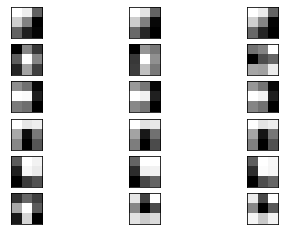

In [6]:
from matplotlib import pyplot

n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

## Show activations of First Convolutional Layer

Investigate features by observing which areas in the convolutional layers activate on an image and comparing with the corresponding areas in the original images. Each layer of a convolutional neural network consists of many 2-D arrays called channels. Pass the image through the network and examine the output activations of the block_conv1 layer.

In [7]:
from tensorflow.keras.models import Model

c1_net = Model(inputs = model.inputs, outputs = model.layers[1].output)


Read and show an image. Save its size for future use. 

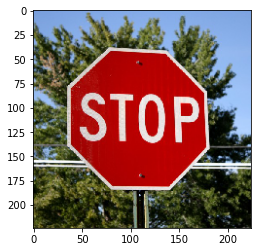

In [8]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot

# Load the image with the required shape
img = load_img('StopSign.jpg',target_size = (224,224))
# convert the image to an array
img = img_to_array(img)

# Display the image
pyplot.imshow(img.astype('uint8'))
pyplot.show()



In [9]:
img.shape

(224, 224, 3)

Prepare data to be used in network.

In [10]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from numpy import expand_dims

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img,axis=0)

In [11]:
img.shape

(1, 224, 224, 3)

In [12]:
#prepare the image (e.g. Scale pixel values for the vgg)
img = preprocess_input(img)

In [13]:
img.shape

(1, 224, 224, 3)

We can feed the data through the first layer of the network using the model.predict() function.

In [14]:
# get feature map for first hidden layer
feature_maps = c1_net.predict(img)

In [15]:
feature_maps.shape

(1, 224, 224, 64)

The activations are returned as a 5-D array, with the fifth dimension indexing the channel and the 3rd and 4th dimensions being the x and y dimensions of the output. We can plot all of the activations as a grid.

## Here I found the data is not 5-D but a 4-D dataset.

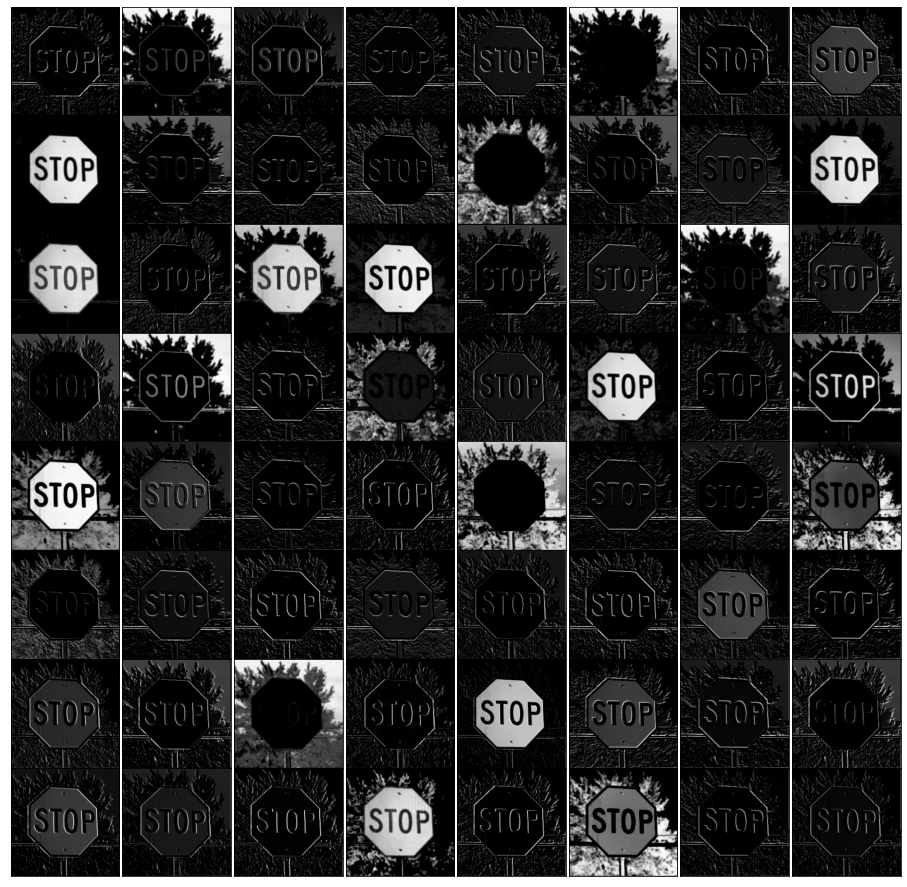

In [16]:
import matplotlib.gridspec as gridspec
pyplot.rcParams["figure.figsize"] = [16,16]


# plot all 64 maps in an 8x8 squares
square = 8
ix = 0
fig, axs = pyplot.subplots(square, square, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)

for i in range(square):
    for j in range(square):
        # specify subplot and turn of axis
        #ax = pyplot.subplot(square, square, ix)
        #pyplot.subplot(gs1[i])
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        
        # plot filter channel in grayscale
        axs[i,j].imshow(feature_maps[0, :, :, ix], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

For a more in depth tutorial see: https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/